# Preprocess 49-00009 (Seattle, WA)

In [3]:
import pandas

from cpe_help import Department

In [5]:
dept = Department('49-00009')
path = dept.tabular_input_dir / '49-00009_UOF.csv'
df = pandas.read_csv(path, skiprows=[1])

df.head().T

,0,1,2,3,4
INCIDENT_UNIQUE_IDENTIFIER,18412-2238-14470,16162-1589-12833,30638-2146-17272,31850-634-11958,15041-2017-12130
INCIDENT_UNIQUE)IDENTIFIER.1,18412,16162,30638,31850,15041
TYPE_OF_FORCE_USED,Level 1 - Use of Force,Level 1 - Use of Force,Level 1 - Use of Force,Level 1 - Use of Force,Level 1 - Use of Force
INCIDENT_DATE,11/28/17 1:40,6/22/17 4:15,7/21/18 18:58,8/10/18 12:40,3/30/17 15:59
LOCATION_DISTRICT,-,-,-,-,-
LOCATION_DISTRICT.1,-,-,-,-,-
LOCATION_DISTRICT.2,-,-,-,-,-
OFFICER_ID,2238,1589,2146,634,2017
SUBJECT_ID,14470,12833,17272,11958,12130
SUBJECT_RACE,Black or African American,Black or African American,White,Not Specified,White


In [6]:
df.shape

(8687, 11)

Various officers, same subject:

In [13]:
df[datef == '2014-05-01 20:54:00'].head(10)

,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_UNIQUE)IDENTIFIER.1,TYPE_OF_FORCE_USED,INCIDENT_DATE,LOCATION_DISTRICT,LOCATION_DISTRICT.1,LOCATION_DISTRICT.2,OFFICER_ID,SUBJECT_ID,SUBJECT_RACE,SUBJECT_GENDER
990,1836-1708-1020,1836,Level 1 - Use of Force,5/1/14 20:54,W,D,D2,1708,1020,Not Specified,Not Specified
991,1785-1659-1708,1785,Level 1 - Use of Force,5/1/14 20:54,W,D,D2,1659,1708,Not Specified,Not Specified
992,1791-1685-1708,1791,Level 1 - Use of Force,5/1/14 20:54,W,D,D2,1685,1708,Not Specified,Not Specified
993,1820-1672-1708,1820,Level 1 - Use of Force,5/1/14 20:54,W,D,D2,1672,1708,Not Specified,Not Specified
994,1812-769-1708,1812,Level 1 - Use of Force,5/1/14 20:54,W,D,D2,769,1708,Not Specified,Not Specified
995,1814-1582-1708,1814,Level 1 - Use of Force,5/1/14 20:54,W,D,D2,1582,1708,Not Specified,Not Specified
996,1802-1616-1708,1802,Level 1 - Use of Force,5/1/14 20:54,W,D,D2,1616,1708,Not Specified,Not Specified
997,1804-1176-1708,1804,Level 1 - Use of Force,5/1/14 20:54,W,D,D2,1176,1708,Not Specified,Not Specified
998,1847-1599-1708,1847,Level 1 - Use of Force,5/1/14 20:54,W,D,D2,1599,1708,Not Specified,Not Specified
999,1837-898-1708,1837,Level 1 - Use of Force,5/1/14 20:54,W,D,D2,898,1708,Not Specified,Not Specified


# Date

In [10]:
date = df['INCIDENT_DATE']
datef = pandas.to_datetime(date, format='%m/%d/%y %H:%M')

In [11]:
datef.describe()

count                    8687
unique                   6461
top       2014-05-01 20:54:00
freq                       24
first     2014-01-27 21:10:00
last      2018-10-10 10:30:00
Name: INCIDENT_DATE, dtype: object

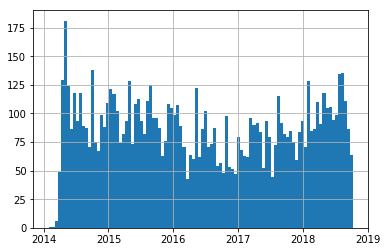

In [16]:
datef.hist(bins=100)

Few dates at the beginning. Adoption period?

# Location

In [17]:
location = df[[c for c in df if c.startswith('LOCATION')]]
location.head()

,LOCATION_DISTRICT,LOCATION_DISTRICT.1,LOCATION_DISTRICT.2
0,-,-,-
1,-,-,-
2,-,-,-
3,-,-,-
4,-,-,-


In [19]:
location.apply(lambda x: x.nunique())

LOCATION_DISTRICT       7
LOCATION_DISTRICT.1    20
LOCATION_DISTRICT.2    54
dtype: int64

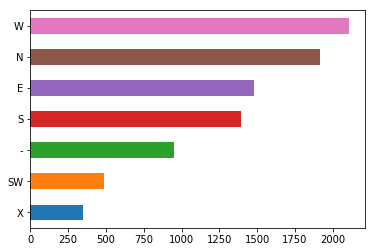

In [22]:
df['LOCATION_DISTRICT'].value_counts().sort_values(ascending=True).plot(kind='barh')

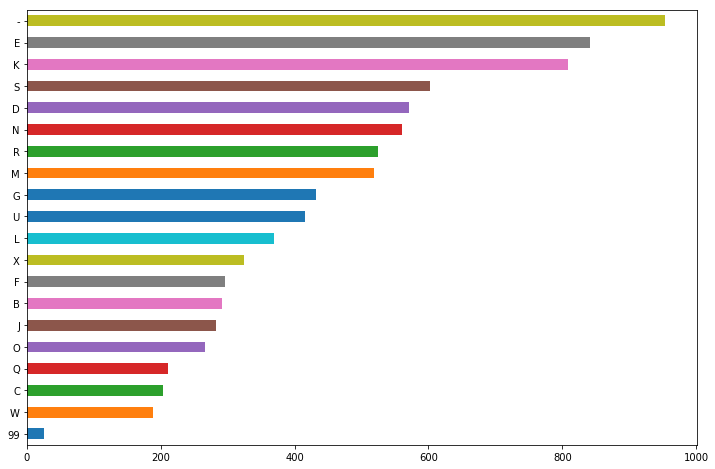

In [25]:
df['LOCATION_DISTRICT.1'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(12, 8))

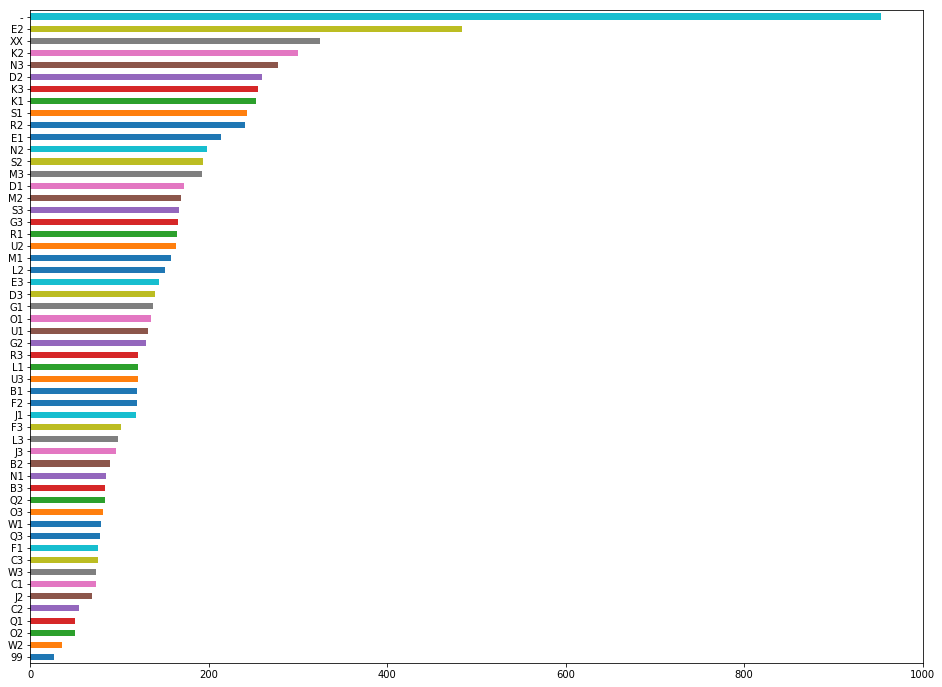

In [26]:
df['LOCATION_DISTRICT.2'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(16, 12))

Hmmm, lots of empty